<a href="https://colab.research.google.com/github/lalithakre/DigitRecognitionSystem/blob/main/DigitRecognitionUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

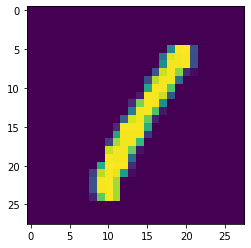

In [27]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[3])

In [28]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
xtrain.shape

(60000, 28, 28)

In [29]:
xtrain=xtrain.reshape(-1,28,28,1)

In [30]:
xtrain.shape


(60000, 28, 28, 1)

In [31]:
xtest1=xtest.reshape(-1,28,28,1)
xtest.shape

(10000, 28, 28)

In [32]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
ob=Sequential()
ob.add(Conv2D(28,kernel_size=(3,3),input_shape=(28,28,1)))
ob.add(MaxPool2D(pool_size=(2,2)))
ob.add(Flatten())
ob.add(Dense(64,activation='relu'))
#ob.add(Dropout(0.2))
ob.add(Dense(10,activation='softmax'))
ob.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
es=EarlyStopping(monitor='accuracy',min_delta=0.001,patience=3,mode='auto',baseline=0)

In [33]:
hs=ob.fit(xtrain,ytrain,validation_data=(xtest,ytest),callbacks=[es],epochs=10)

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.7336 - accuracy: 0.8678 - val_loss: 0.2349 - val_accuracy: 0.9426
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1861 - accuracy: 0.9523 - val_loss: 0.1848 - val_accuracy: 0.9544
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1353 - accuracy: 0.9630 - val_loss: 0.1376 - val_accuracy: 0.9619
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1193 - accuracy: 0.9674 - val_loss: 0.1669 - val_accuracy: 0.9618
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0992 - accuracy: 0.9713 - val_loss: 0.1680 - val_accuracy: 0.9597
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0906 - accuracy: 0.9742 - val_loss: 0.1530 - val_accuracy: 0.9642
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0879 - accuracy: 0.9753 - val_loss: 0.1865 -

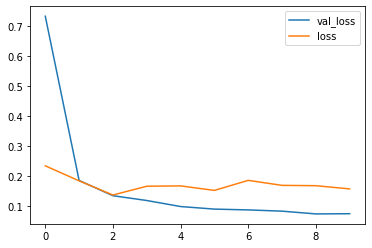

In [39]:
import matplotlib.pyplot as plt
plt.plot(hs.history['loss'])
plt.plot(hs.history['val_loss'])
plt.legend(['val_loss','loss'])

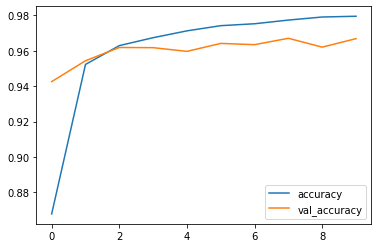

In [40]:
plt.plot(hs.history['accuracy'])
plt.plot(hs.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])

In [ ]:
import numpy as np
xtest[21].shape

(28, 28)

In [ ]:
ob.evaluate(xtest1,ytest)

313/313 [==============================] - 3s 9ms/step - loss: 0.1776 - accuracy: 0.9698


[0.17758436501026154, 0.9697999954223633]

In [ ]:
pred=ob.predict(xtest1)
pred1=pred[1]

313/313 [==============================] - 3s 8ms/step


In [ ]:
j=np.argmax(pred1)

In [ ]:
j

2

In [ ]:
pred1=[0,0,0,0,0,0,0,0,0,0,0]
pred1[j]=1

In [ ]:
pred1

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

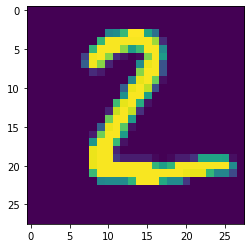

In [ ]:
plt.imshow(xtest[1])